In [1]:
import pandas as pd
import geopandas as gpd
import os
from matplotlib import pyplot as plt
from matplotlib.cbook import flatten
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from glob import glob

In [2]:
os.chdir('/exports/csce/datastore/geos/users/s1332488/chapter2_data/RADD_compare')

In [3]:
radd = gpd.read_file('RADD_polygons_2020.zip')
aoi = gpd.read_file('AOI.zip')

DriverError: '/vsizip/AOI.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [13]:
print(radd.shape)
radd.intersects(aoi.unary_union).sum()

(69595, 3)


4002

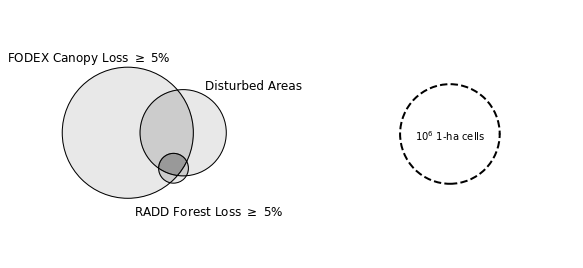

In [103]:
fig,axs = plt.subplots(1,2,figsize=(10,10))
# (Abc, aBc, ABc, abC, AbC, aBC, ABC)
F = 1732034
D = 749763
R = 89548
FandD = 431399
FandR = 71248
DandR = 65495
ALL = 60161

SUBSETS = np.array([F-FandD-FandR+ALL,
           D-FandD-DandR+ALL,
           FandD-ALL, 
           R-FandR-DandR+ALL,
           FandR-ALL,
           DandR-ALL,
                 ALL])/1000000

v = venn3(subsets = SUBSETS,ax=axs[0])
c = venn3_circles(subsets = SUBSETS, linewidth=1, color="black",ax=axs[0])
v.get_label_by_id('A').set_text('FODEX Canopy Loss $\geq$ 5%')
v.get_label_by_id('A').set_x(0.2)
v.get_label_by_id('A').set_y(0.57)
v.get_label_by_id("100").set_text("")
v.get_label_by_id("010").set_text("")
v.get_patch_by_id('111').set_color('black')
for id in ['110','101','011']:
    v.get_patch_by_id(id).set_color('#808080')
for id in ['100','001','010']:
    v.get_patch_by_id(id).set_color('#c7c7c7')
v.get_label_by_id("001").set_visible(False)
v.get_label_by_id("110").set_visible(False)
v.get_label_by_id("101").set_visible(False)
v.get_label_by_id("011").set_visible(False)
v.get_label_by_id("111").set_visible(False)
v.get_label_by_id('B').set_text('Disturbed Areas')
v.get_label_by_id('C').set_text('RADD Forest Loss $\geq$ 5%')
v.get_label_by_id('C').set_x(0.5)
v.get_label_by_id('C').set_y(-0.57)

scale_sub = (1.0,0,0,0,0,0,0)
c2 = venn3_circles(subsets=scale_sub,ls='--')
axs[1].text(-0.4,-0.075,'$10^6$ 1-ha cells')

max_area = SUBSETS.sum()
def set_venn_scale(ax, true_area, reference_area=max_area):
    s = np.sqrt(float(reference_area)/true_area)
    ax.set_xlim(-s, s)
    ax.set_ylim(-s, s)

for a, d in zip(flatten(axs), [SUBSETS,scale_sub]):
    set_venn_scale(a, sum(d))

#plt.tight_layout()
plt.savefig('/home/s1332488/chapter2/venn.png',dpi=300)
plt.show()

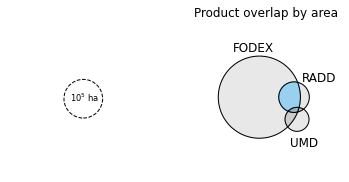

In [209]:
fig,axs = plt.subplots(1,2,figsize=(6,6))
# (Abc, aBc, ABc, abC, AbC, aBC, ABC)

F,R,U,FR,FU,RU,FRU =451685.80392156006, 62690.09803921569, 38601.49411764656, 45387.109803921674, 12869.501960784326, 4435.090196078434, 3245.4627450980392
    
SUBSETS = np.array([F-FR-FU+FRU,
           R-FR-RU+FRU,
           FR-FRU, 
           U-FU-RU+FRU,
           FU-FRU,
           RU-FRU,
           FRU])/1000000

v = venn3(subsets = SUBSETS,ax=axs[1])
c = venn3_circles(subsets = SUBSETS, linewidth=1, color="black",ax=axs[1])
v.get_label_by_id('A').set_text('FODEX')
v.get_label_by_id('A').set_x(0.1)
v.get_label_by_id('A').set_y(0.62)
v.get_label_by_id("100").set_text("")
v.get_label_by_id("010").set_text("")
v.get_patch_by_id('111').set_color('black')
for id in ['110','101','011']:
    v.get_patch_by_id(id).set_color('#808080')
for id in ['100','001','010']:
    v.get_patch_by_id(id).set_color('#c7c7c7')
v.get_label_by_id("001").set_visible(False)
v.get_label_by_id("110").set_visible(False)
v.get_label_by_id("101").set_visible(False)
v.get_label_by_id("011").set_visible(False)
v.get_label_by_id("111").set_visible(False)
v.get_label_by_id('B').set_text('RADD')
v.get_label_by_id('C').set_text('UMD')
v.get_label_by_id('C').set_x(0.5)
v.get_label_by_id('C').set_y(-0.5)
v.get_patch_by_id('110').set_color('#008ad4')
v.get_patch_by_id('111').set_color('#003d5e')

scale_sub = (0.1,0,0,0,0,0,0)
c2 = venn3_circles(subsets=scale_sub,ls='--',ax=axs[0],lw=1)
axs[0].text(-0.4,-0.075,'$10^5$ ha',size='small')
axs[1].set_title("Product overlap by area")
max_area = SUBSETS.sum()
def set_venn_scale(ax, true_area, reference_area=max_area):
    s = np.sqrt(float(reference_area)/true_area)
    ax.set_xlim(-s, s)
    ax.set_ylim(-s, s)

for a, d in zip(flatten(axs), [scale_sub,SUBSETS]):
    set_venn_scale(a, sum(d))

#plt.tight_layout()
plt.savefig('/home/s1332488/chapter2/venn_CL5pct_FL5pct.png',dpi=300)
plt.show()

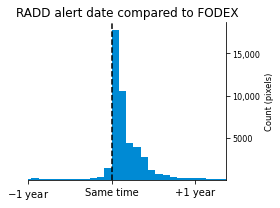

In [9]:
timelag = pd.read_csv('radd_vs_fodex_timelag.csv')
plt.figure(figsize=(4,3))
plt.bar(timelag.bin_centre,timelag['count'],width=32,color='#008ad4')
plt.axvline(x=1,ls='--',color='black')
plt.xticks([-365,0,365],['$-$1 year','Same time','+1 year'],rotation=0)
plt.yticks([5000,10000,15000],['5000','10,000','15,000'])
plt.xlim(-365,500)
plt.ylim(1)
plt.ylabel('Count (pixels)',size='small')
plt.title('RADD alert date compared to FODEX')
ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.tight_layout()
plt.savefig('/home/s1332488/chapter2/RADD_timelag.png',dpi=300)

In [234]:
np.arange(5,365,12)

array([  5,  17,  29,  41,  53,  65,  77,  89, 101, 113, 125, 137, 149,
       161, 173, 185, 197, 209, 221, 233, 245, 257, 269, 281, 293, 305,
       317, 329, 341, 353])